<a href="https://colab.research.google.com/github/chidera20/deedgod/blob/master/Ethereum_Bets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the price of Cryptocurrencies: with 'n' days price forecast

Import dependencies

In [ ]:
import sklearn
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

Upload data set

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ETH.csv to ETH (1).csv


Show Data Frame

In [ ]:
df = pd.read_csv('ETH.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,12/8/2019,152.392929,148.313339,148.743683,151.264725,6441727252,151.264725
1,12/9/2019,151.913940,147.621368,151.224396,148.225174,6744206747,148.225174
2,12/10/2019,148.564468,144.907959,148.179855,146.267044,6859512025,146.267044
3,12/11/2019,147.139206,143.045364,146.320648,143.608002,7037180049,143.608002
4,12/12/2019,145.751648,141.436981,143.615662,145.604004,7890383413,145.604004


In [ ]:
df.shape

(518, 7)

Visualize the close price data

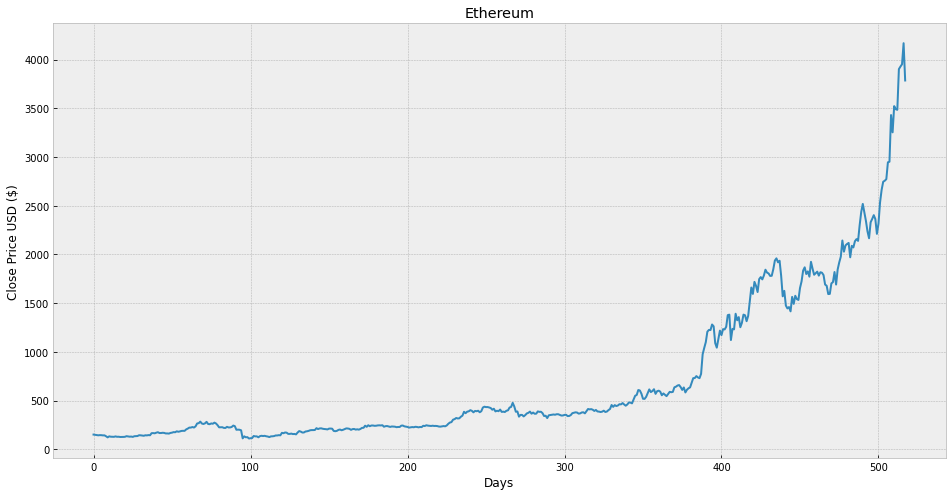

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Ethereum')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

Create a variable for predicting 'n' days out into the future

In [ ]:
projection = 14

Create another column called prediction

In [ ]:
df['Prediction'] = df[['Close']].shift(-projection)

In [ ]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Prediction
0,12/8/2019,152.392929,148.313339,148.743683,151.264725,6441727252,151.264725,132.372513
1,12/9/2019,151.913940,147.621368,151.224396,148.225174,6744206747,148.225174,128.614090
2,12/10/2019,148.564468,144.907959,148.179855,146.267044,6859512025,146.267044,129.063888
3,12/11/2019,147.139206,143.045364,146.320648,143.608002,7037180049,143.608002,126.454636
4,12/12/2019,145.751648,141.436981,143.615662,145.604004,7890383413,145.604004,126.361221


Specify data and target

In [ ]:
X = df.iloc[:,4].values

In [ ]:
X = X[:-projection].reshape(-1,1)

In [ ]:
y = df.iloc[:,7].values

In [ ]:
y = y[:-projection]

Split the data into 80% training and 20% testing

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Linear Regression

Fit the models

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
ls = linear_model.Lasso(alpha=0.1)
ls.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
ridge = linear_model.Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

Make predictions

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred_las = ls.predict(X_test)

In [ ]:
y_pred_rig = ridge.predict(X_test)

Performance Evaluation

In [ ]:
RMSE = pow(mean_squared_error(y_pred, y_test),0.5)
R = r2_score(y_pred,y_test)

print("RMSE is ", RMSE)
print("R Squared is ", R)

RMSE is  195.7355480479925
R Squared is  0.9291285204784858


In [ ]:
RMSE_LASSO = pow(mean_squared_error(y_pred_las, y_test),0.5)
R_LASSO = r2_score(y_pred_las,y_test)

print("RMSE LASSO is ", RMSE_LASSO)
print("R Squared LASSO is ", R_LASSO)

RMSE LASSO is  195.73551973824794
R Squared LASSO is  0.9291285131771522


In [ ]:
RMSE_RIDGE = pow(mean_squared_error(y_pred_rig, y_test),0.5)
R_RIDGE = r2_score(y_pred_rig,y_test)

print("RMSE RIDGE is ", RMSE_RIDGE)
print("R Squared RIDGE is ", R_RIDGE)

RMSE RIDGE is  195.73554803955764
R Squared RIDGE is  0.9291285204763102


Test the models using score

In [ ]:
lr_confidence = lr.score(X_test, y_test)
print('Linear regression Confidence: ', lr_confidence)

Linear regression Confidence:  0.9269271025234608


In [ ]:
ls_confidence = ls.score(X_test, y_test)
print('Lasso Confidence: ', ls_confidence)

Lasso Confidence:  0.926927123660908


In [ ]:
ridge_confidence = ridge.score(X_test, y_test)
print('Ridge Confidence: ', ridge_confidence)

Ridge Confidence:  0.9269271025297586


Create a variable and set it equal to the last 14 days of the original data set

In [ ]:
 X_projection = df.iloc[:,4].values[-projection:]

In [ ]:
X_projection = np.array(X_projection).reshape(-1,1)

Print the linear regression models prediction for the next 14 days

In [ ]:
lr_prediction = lr.predict(X_projection)
print(lr_prediction)

[3281.60101765 3301.20928031 3508.56091373 3515.9615026  4091.15450838
 3878.07412444 4201.25926555 4162.95209339 4155.56586903 4657.37974028
 4688.83568852 4716.99222431 4976.84216184 4517.13381604]


In [ ]:
ls_prediction = ls.predict(X_projection)
print(ls_prediction)

[3281.60051436 3301.20877317 3508.56036592 3515.96095334 4091.1538463
 3878.07350416 4201.25858187 4162.95141722 4155.56519432 4657.37896714
 4688.83490921 4716.99143947 4976.84132604 4517.13307041]


In [ ]:
ridge_prediction = ridge.predict(X_projection)
print(ridge_prediction)

[3281.6010175  3301.20928016 3508.56091357 3515.96150244 4091.15450819
 3878.07412426 4201.25926535 4162.95209319 4155.56586883 4657.37974005
 4688.83568829 4716.99222408 4976.84216159 4517.13381582]


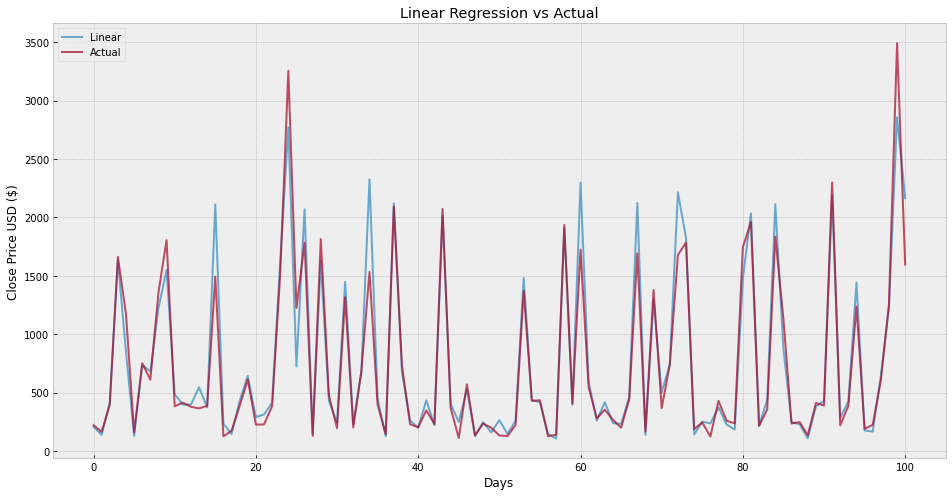

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Linear Regression vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(y_pred, label = 'Linear', lw=2, alpha=0.7)
plt.plot(y_test, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

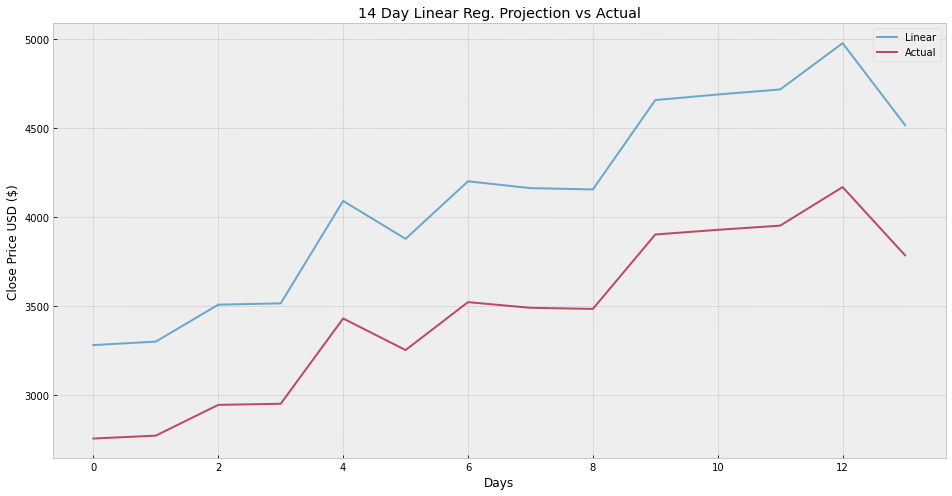

In [ ]:
plt.figure(figsize=(16,8))
plt.title('14 Day Linear Reg. Projection vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(lr_prediction, label = 'Linear', lw=2, alpha=0.7)
plt.plot(X_projection, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

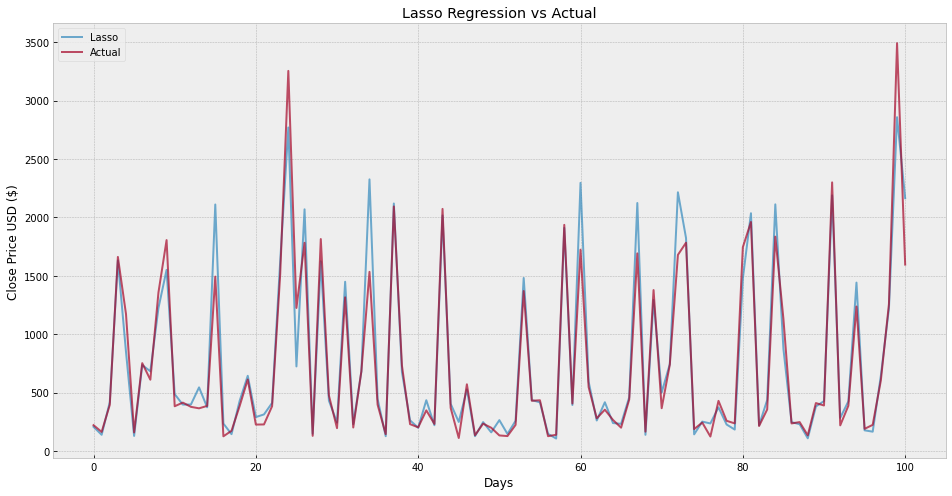

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Lasso Regression vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(y_pred_las, label = 'Lasso', lw=2, alpha=0.7)
plt.plot(y_test, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

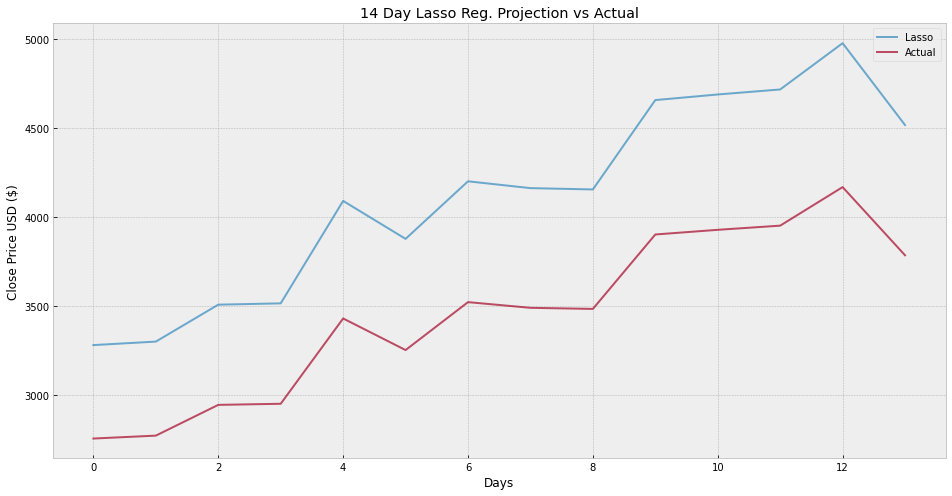

In [ ]:
plt.figure(figsize=(16,8))
plt.title('14 Day Lasso Reg. Projection vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(ls_prediction, label = 'Lasso', lw=2, alpha=0.7)
plt.plot(X_projection, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

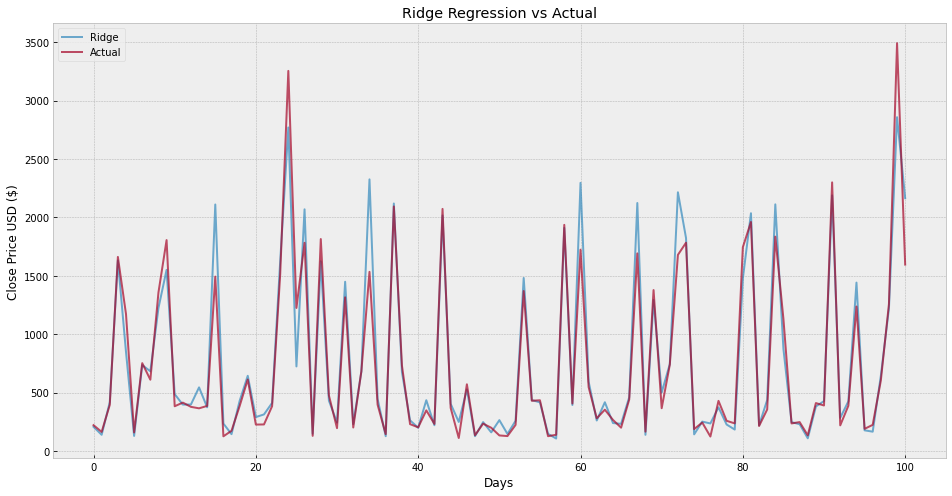

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Ridge Regression vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(y_pred_rig, label = 'Ridge', lw=2, alpha=0.7)
plt.plot(y_test, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

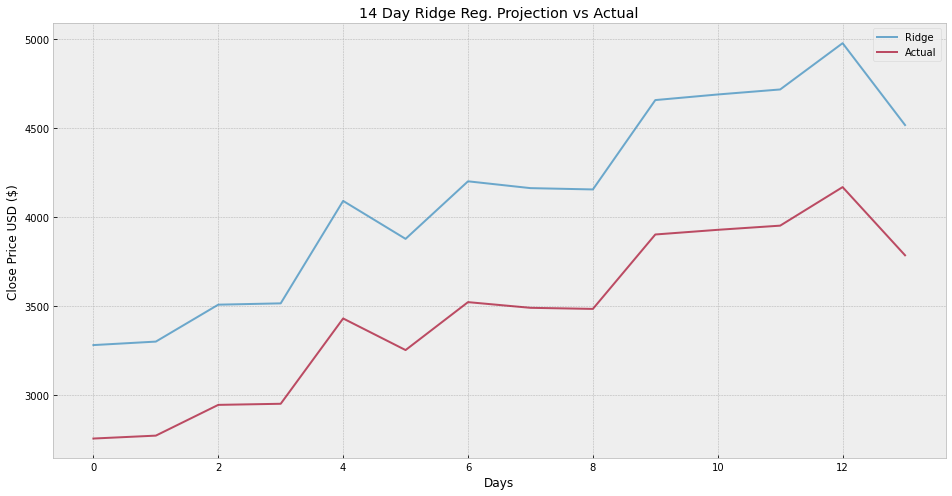

In [ ]:
plt.figure(figsize=(16,8))
plt.title('14 Day Ridge Reg. Projection vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(ridge_prediction, label = 'Ridge', lw=2, alpha=0.7)
plt.plot(X_projection, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

# Support Vector Machine: Regression (SVR)

SVM rbf (default)

In [ ]:
svr_rbf = SVR()

In [ ]:
svr_rbf.fit(X_train, y_train)

SVR()

In [ ]:
svr_rbf_confidence = svr_rbf.score(X_test, y_test)
print('svr_rbf accuracy: ', svr_rbf_confidence)

svr_rbf accuracy:  -0.06498206426590936


In [ ]:
svr_rbf_prediction = svr_rbf.predict(X_test)

In [ ]:
print(svr_rbf_prediction)

[334.04037134 329.26210849 360.98871334 500.55688964 437.4274051
 328.76481022 418.40430242 408.79960491 480.85376672 498.00684096
 372.79522712 357.78126775 357.90861811 383.26816333 354.26108465
 504.85871246 336.62944178 329.56620801 362.84294194 401.67778106
 342.7806175  345.62656929 360.06751163 500.38600897 479.76019254
 416.31518428 505.28782844 329.75419422 500.34508249 363.32754635
 337.43754123 493.98760249 336.20226436 408.3200873  500.02920918
 365.57390123 328.65182293 504.74910855 407.51562517 339.50978495
 333.40132213 363.87187185 335.27584909 505.59798913 358.87346177
 338.0440433  380.17380615 328.65194882 337.89662609 330.49003735
 339.72165177 329.6621812  339.11222856 495.37877213 364.0223046
 360.93095767 329.707905   327.77826375 505.44308799 357.2496411
 500.93965891 392.25594732 339.38472034 361.00535779 337.07827736
 336.39374961 368.12863915 504.69311619 329.24797144 485.59482235
 375.20666208 419.82362282 503.04740317 504.58241312 329.46774278
 338.34391334

In [ ]:
print(y_test)

[ 220.6751251  162.9285583  393.8883057 1660.909546  1171.834595
  158.2160187  751.6189575  609.8178711 1357.058105  1805.084106
  382.6326294  413.7729797  377.4418335  364.8392029  385.5443726
 1492.608765   125.2143021  172.2971649  384.0010376  611.6071777
  225.6802673  226.760498   382.8199768 1515.193726  3253.629395
 1224.197144  1781.99292    129.0638885 1814.109863   474.6264343
  194.8685303 1314.986206   200.677124   682.642334  1533.275024
  395.835144   143.5439911 2093.122803   730.3973389  229.2742615
  201.9023132  347.3215942  230.975708  2072.108887   368.8559265
  110.6058731  570.6866455  134.1717072  233.6408844  198.41539
  132.7371674  127.2146072  222.9597931 1369.040527   429.53125
  433.7866211  126.3612213  138.361557  1935.601074   406.2177734
 1723.153809   545.7973633  279.2154236  353.1219177  265.6006165
  199.1932831  440.0404968 1691.355957   165.101944  1377.295898
  365.8122864  737.8034058 1678.650146  1782.855103   186.9140015
  243.0159607  123.

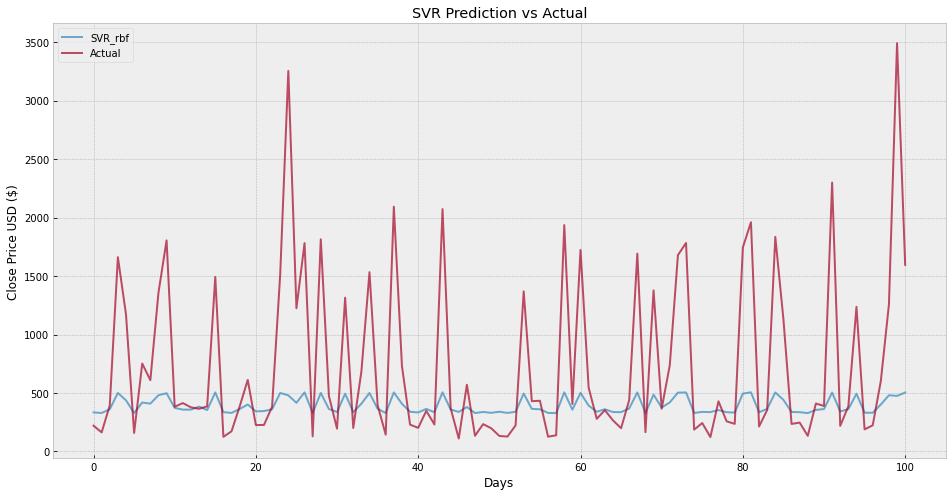

In [ ]:
plt.figure(figsize=(16,8))
plt.title('SVR Prediction vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(svr_rbf_prediction, label = 'SVR_rbf', lw=2, alpha=0.7)
plt.plot(y_test, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

In [ ]:
rbf_prediction = svr_rbf.predict(X_projection)

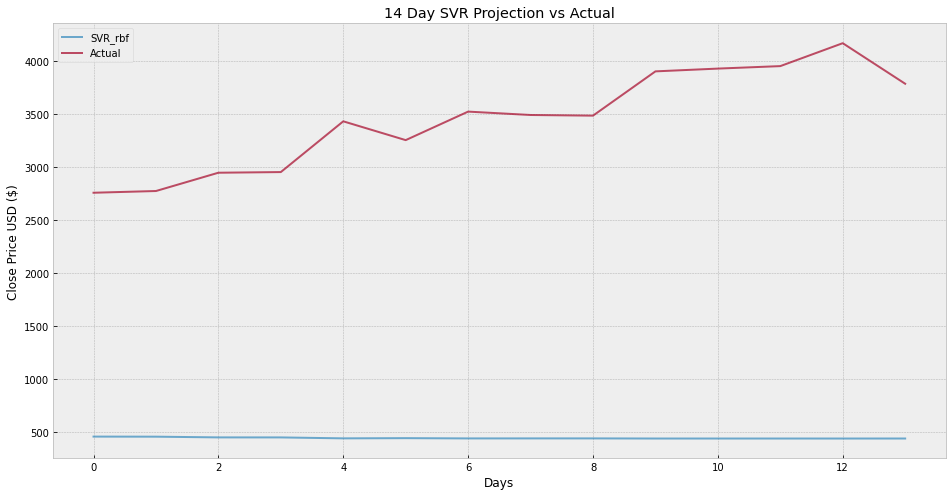

In [ ]:
plt.figure(figsize=(16,8))
plt.title('14 Day SVR Projection vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(rbf_prediction, label = 'SVR_rbf', lw=2, alpha=0.7)
plt.plot(X_projection, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

SVR Linear

In [ ]:
svr_Linear = SVR(kernel='linear', C=1e3, gamma=0.0001)

In [ ]:
svr_Linear.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.0001, kernel='linear')

In [ ]:
svr_Linear_confidence = svr_Linear.score(X_test, y_test)
print('svr_Linear accuracy: ', svr_Linear_confidence)

svr_Linear accuracy:  0.9211906246077896


In [ ]:
svr_Linear_prediction = svr_Linear.predict(X_test)

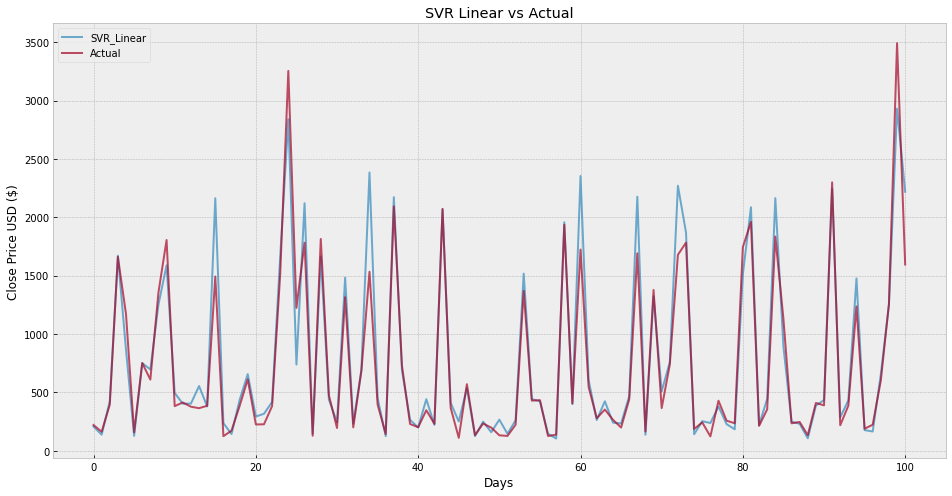

In [ ]:
plt.figure(figsize=(16,8))
plt.title('SVR Linear vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(svr_Linear_prediction, label = 'SVR_Linear', lw=2, alpha=0.7)
plt.plot(y_test, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

In [ ]:
Linear_prediction = svr_Linear.predict(X_projection)

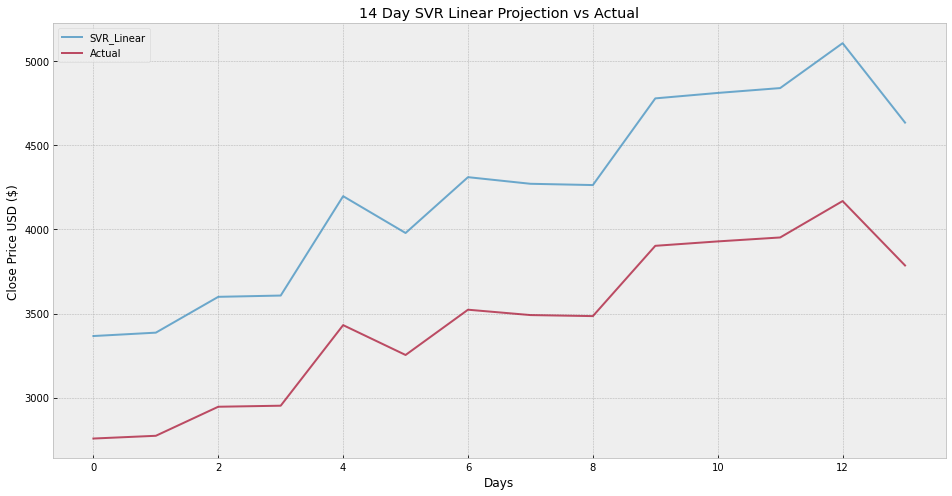

In [ ]:
plt.figure(figsize=(16,8))
plt.title('14 Day SVR Linear Projection vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(Linear_prediction, label = 'SVR_Linear', lw=2, alpha=0.7)
plt.plot(X_projection, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

SVR Polynomial

In [ ]:
svr_Poly = SVR(kernel='poly', C=1e3, gamma=0.0001)

In [ ]:
svr_Poly.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.0001, kernel='poly')

In [ ]:
svr_Poly_confidence = svr_Poly.score(X_test, y_test)
print('svr_Poly accuracy: ', svr_Poly_confidence)

svr_Poly accuracy:  -7.427333970739719


In [ ]:
svr_Poly_prediction = svr_Poly.predict(X_test)

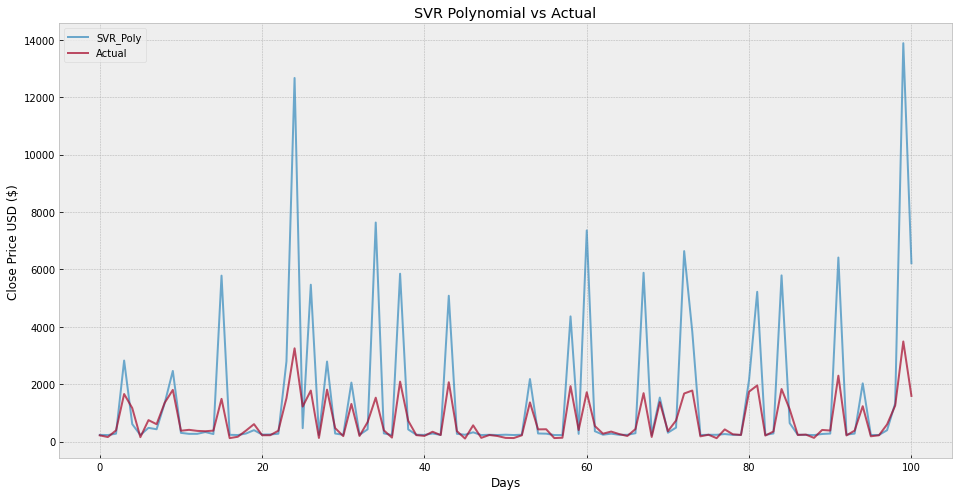

In [ ]:
plt.figure(figsize=(16,8))
plt.title('SVR Polynomial vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(svr_Poly_prediction, label = 'SVR_Poly', lw=2, alpha=0.7)
plt.plot(y_test, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

In [ ]:
Poly_prediction = svr_Poly.predict(X_projection)

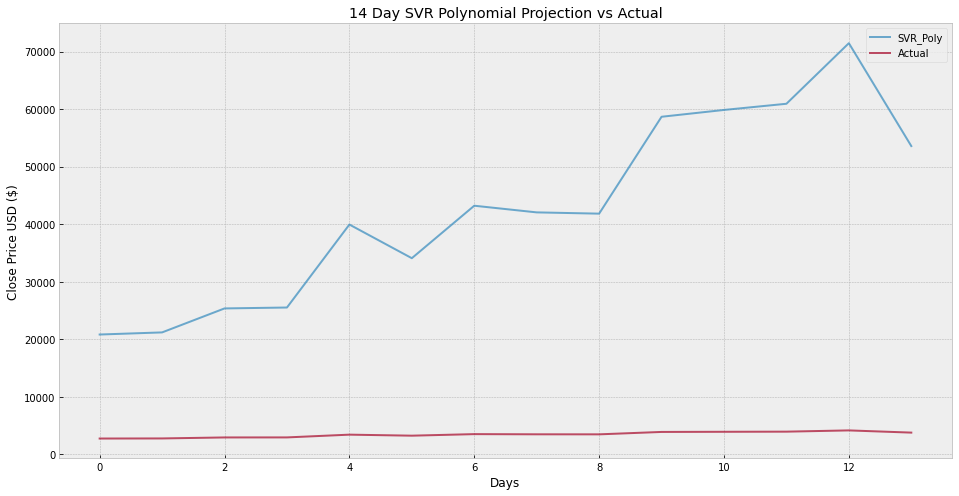

In [ ]:
plt.figure(figsize=(16,8))
plt.title('14 Day SVR Polynomial Projection vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(Poly_prediction, label = 'SVR_Poly', lw=2, alpha=0.7)
plt.plot(X_projection, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

SVR Sigmoid

In [ ]:
svr_Sigmoid = SVR(kernel='sigmoid', C=1e3, gamma=0.0001)

In [ ]:
svr_Sigmoid.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.0001, kernel='sigmoid')

In [ ]:
svr_Sigmoid_confidence = svr_Sigmoid.score(X_test, y_test)
print('svr_Sigmoid accuracy: ', svr_Sigmoid_confidence)

svr_Sigmoid accuracy:  -5.479611304613001


In [ ]:
svr_Sigmoid_prediction = svr_Sigmoid.predict(X_test)

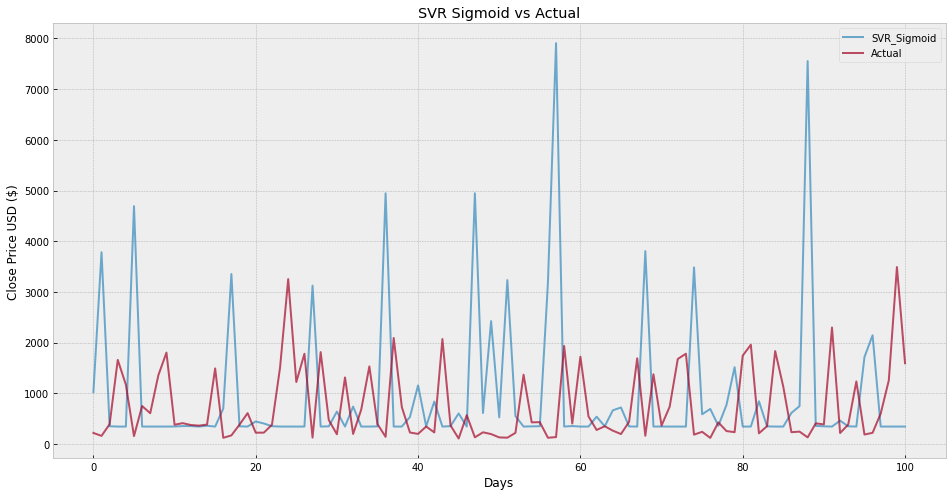

In [ ]:
plt.figure(figsize=(16,8))
plt.title('SVR Sigmoid vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(svr_Sigmoid_prediction, label = 'SVR_Sigmoid', lw=2, alpha=0.7)
plt.plot(y_test, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

In [ ]:
Sigmoid_prediction = svr_Sigmoid.predict(X_projection)

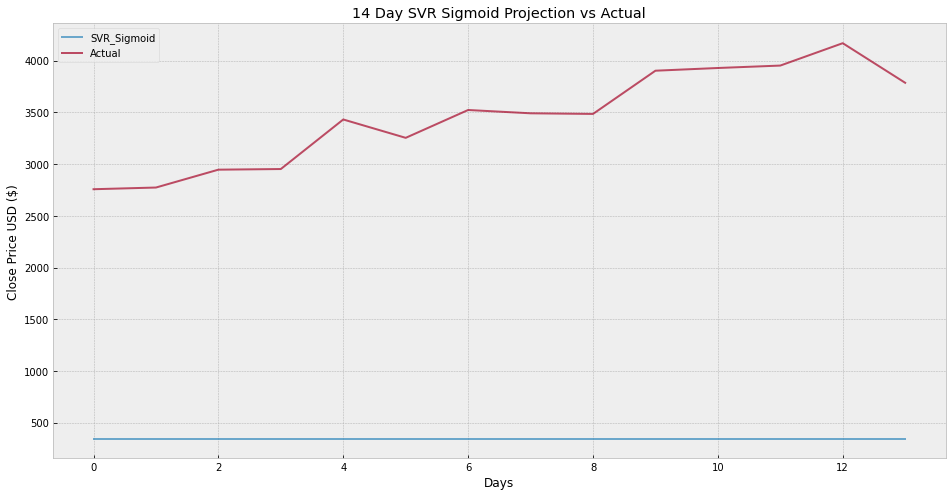

In [ ]:
plt.figure(figsize=(16,8))
plt.title('14 Day SVR Sigmoid Projection vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(Sigmoid_prediction, label = 'SVR_Sigmoid', lw=2, alpha=0.7)
plt.plot(X_projection, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

# Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=4, include_bias=False)

In [ ]:
poly_features = poly.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( poly_features, y, test_size=0.3, random_state=42)

In [ ]:
poly_reg_model = LinearRegression()

Fit the model

In [ ]:
poly_reg_model.fit(X_train, y_train)

LinearRegression()

Make predictions

In [ ]:
y_pred = poly_reg_model.predict(X_test)

Performance Evaluation

In [ ]:
RMSE = pow(mean_squared_error(y_pred, y_test),0.5)
R = r2_score(y_pred,y_test)

print("RMSE is ", RMSE)
print("R Squared is ", R)

RMSE is  211.0316615153076
R Squared is  0.9280595341240282


Test the model using score

In [ ]:
poly_confidence = poly_reg_model.score(X_test, y_test)
print('Polynomial regression confidence: ', poly_confidence)

Polynomial regression confidence:  0.9442891831260616


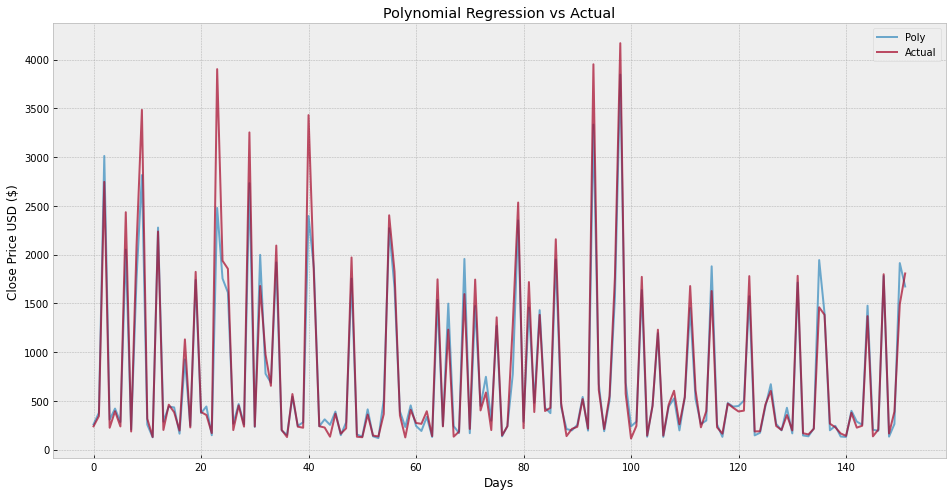

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Polynomial Regression vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(y_pred, label = 'Poly', lw=2, alpha=0.7)
plt.plot(y_test, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()

Print the polynomial regression model prediction for the next 14 days

In [ ]:
poly1 = PolynomialFeatures(degree=1, include_bias=False)

In [ ]:
poly_features_projection = poly1.fit_transform(X_projection)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( poly_features_projection, X_projection, test_size=0.3, random_state=42)

In [ ]:
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
poly_reg_prediction = poly_reg_model.predict(poly_features_projection)
print(poly_reg_prediction)

[[2756.876953]
 [2773.207031]
 [2945.892822]
 [2952.056152]
 [3431.086182]
 [3253.629395]
 [3522.783203]
 [3490.880371]
 [3484.729004]
 [3902.647705]
 [3928.844727]
 [3952.293945]
 [4168.701172]
 [3785.848633]]


In [ ]:
print(poly_features_projection)

[[2756.876953]
 [2773.207031]
 [2945.892822]
 [2952.056152]
 [3431.086182]
 [3253.629395]
 [3522.783203]
 [3490.880371]
 [3484.729004]
 [3902.647705]
 [3928.844727]
 [3952.293945]
 [4168.701172]
 [3785.848633]]


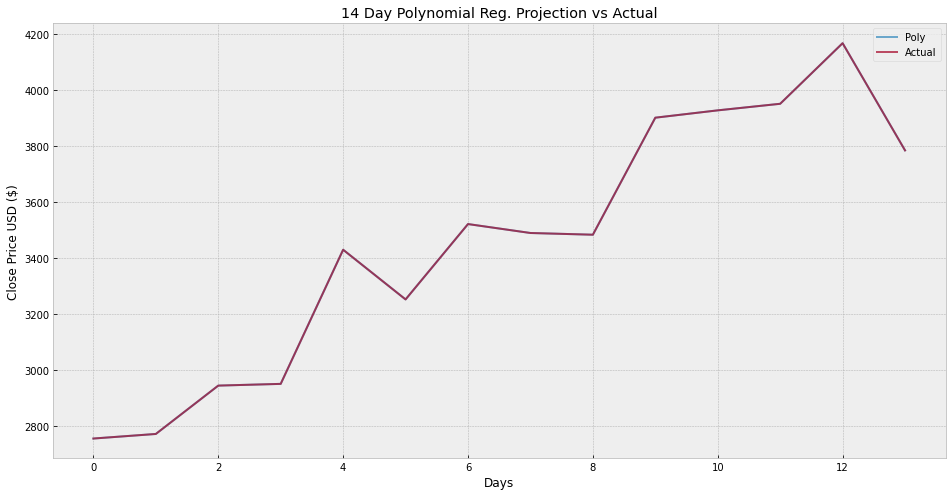

In [ ]:
plt.figure(figsize=(16,8))
plt.title('14 Day Polynomial Reg. Projection vs Actual')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(poly_reg_prediction, label = 'Poly', lw=2, alpha=0.7)
plt.plot(poly_features_projection, label = 'Actual', lw=2, alpha=0.7)
plt.legend()
plt.show()